In [ ]:
!wget https://www.dropbox.com/s/9019cpkapt5zm4w/Pic_OralCancer.rar?dl=0

--2023-02-17 07:31:16--  https://www.dropbox.com/s/9019cpkapt5zm4w/Pic_OralCancer.rar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/9019cpkapt5zm4w/Pic_OralCancer.rar [following]
--2023-02-17 07:31:16--  https://www.dropbox.com/s/raw/9019cpkapt5zm4w/Pic_OralCancer.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf241bd3b29ee414c9fa6d8ca6a.dl.dropboxusercontent.com/cd/0/inline/B2qt5P572k7uD8mT_M2Ufc70VevdoGfs9yGKtfUHNzL4aBGREks6ZY6M3HilFcs3SfqWovEpx1QGfxnJEGIaHxN_jaBxVdC8_tfHJ8qOdkLh6zFYnef3t81KeJHJ8oN2oVj6-sQrMBO4zJH8bPHQoPcCvGMnGwBfug4hKcSdO7KAmQ/file# [following]
--2023-02-17 07:31:16--  https://ucf241bd3b29ee414c9fa6d8ca6a.dl.dropboxusercontent.com/cd/0/inline/B2qt5P572k7uD8mT_M2Ufc70VevdoGfs9yGKtfUHNzL4aBGREks6ZY6M3

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import patoolib
patoolib.extract_archive("/content/Pic_OralCancer.rar?dl=0")

patool: Extracting /content/Pic_OralCancer.rar?dl=0 ...
patool: running /usr/bin/unrar x -- /content/Pic_OralCancer.rar?dl=0
patool:     with cwd='./Unpack_v3n4odxd'
patool: ... /content/Pic_OralCancer.rar?dl=0 extracted to `Pic_OralCancer1' (local file exists).


'Pic_OralCancer1'

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
src = ['/content/Pic_OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg',
       '/content/Pic_OralCancer/cancer/41457tn.jpg',
       '/content/Pic_OralCancer/cancer/C0235749-Mouth_cancer-SPL-20170511085515620.jpg',
       '/content/Pic_OralCancer/cancer/dataset_1200px-ZungenCa2a (1).jpg',
       '/content/Pic_OralCancer/cancer/dataset_SRMJResDentSci_2013_4_1_35_116830_u1.jpg',
       '/content/Pic_OralCancer/cancer/dataset_base-of-tongue-cancer-symptoms.jpg',
       '/content/Pic_OralCancer/non-cancer/20200303_1146172.jpg',
       '/content/Pic_OralCancer/non-cancer/20200314_1125032.jpg',
       '/content/Pic_OralCancer/non-cancer/69293_mouth-exam-child-iStock-510174422.jpg_ccba64ac-3050-4b37-9641-ca94b3db2c11.jpeg',
       '/content/Pic_OralCancer/non-cancer/biopsy-oral-cancer.jpg']


In [ ]:
def image_segmentation(original_img, _threshold=250):

    J=cv2.bilateralFilter(original_img,9,75,75)
    a=np.array(J)
    m,n,p=a.shape
    for r in range(1,m-1):
        for c in range(1,n-1):
            s=J[r,c]
            n1=J[r+1,c]
            n2=J[r-1,c]
            n3=J[r,c+1]
            n4=J[r,c-1]
            n5=J[r-1,c-1]
            n6=J[r+1,c+1]
            n7=J[r+1,c-1]
            n8=J[r-1,c+1]

            s1=s-n1
            s2=s-n2
            s3=s-n3
            s4=s-n4
            s5=s-n5
            s6=s-n6
            s7=s-n7
            s8=s-n8
            threshold=_threshold
            if (all(s1<threshold) and all(s2<threshold) and all(s3<threshold) and all(s4<threshold) and all(s5<threshold) and all(s6<threshold) and all(s7<threshold) and all(s8<threshold)):
                J[r,c]=0;
            else:
                J[r,c]=s;

    ret, final_img = cv2.threshold(J, 110, 255, cv2.THRESH_BINARY_INV)
    return final_img;

In [ ]:
def print_image(img_path, img_name):

    img_original = cv2.imread(img_path)
    img_original = cv2.resize(img_original, (200, 200), interpolation=cv2.INTER_CUBIC);
    img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(18,4))
    plt.subplot(1, 6, 1)
    plt.gca().set_title('Original')
    plt.imshow(img_original)
    plt.axis('off')

    for pos, thrs in enumerate([50, 100, 150, 200],start = 2):
        img_seg = image_segmentation(img_original, thrs)
        plt.subplot(1, 6, pos)
        plt.gca().set_title('Threshold - '+str(thrs))
        plt.imshow(img_seg)
        plt.axis('off')

    plt.subplot(1, 6, 6)
    plt.gca().set_title('Negative')
    plt.imshow(255 - np.array(img_original))
    plt.axis('off')

    plt.tight_layout()
    plt.savefig(img_name)
    plt.show()

In [ ]:
dest = 'oral_cancer';

In [ ]:
os.makedirs(f"./{dest}")

FileExistsError: ignored

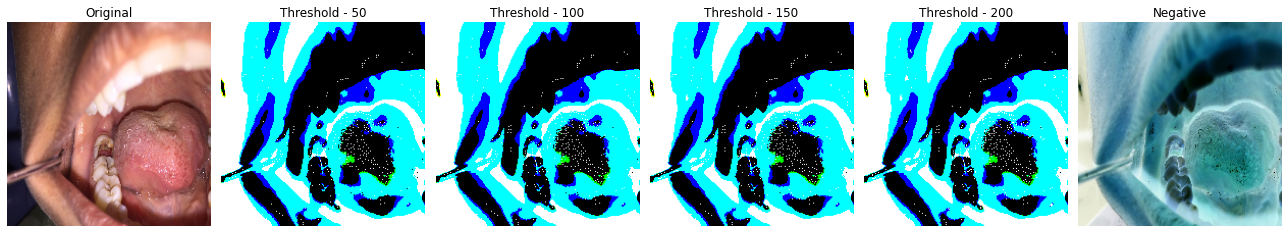

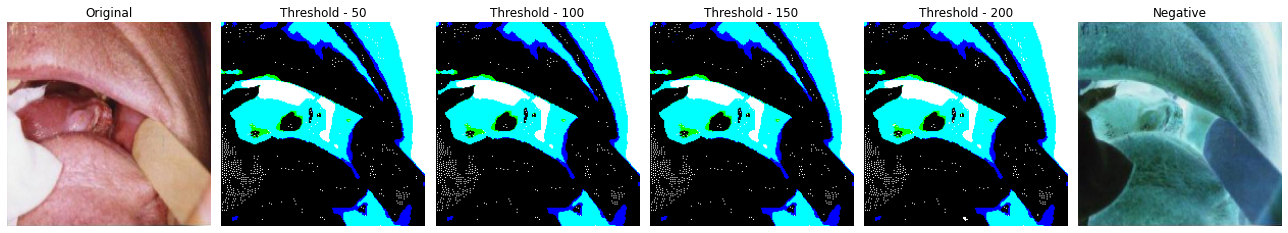

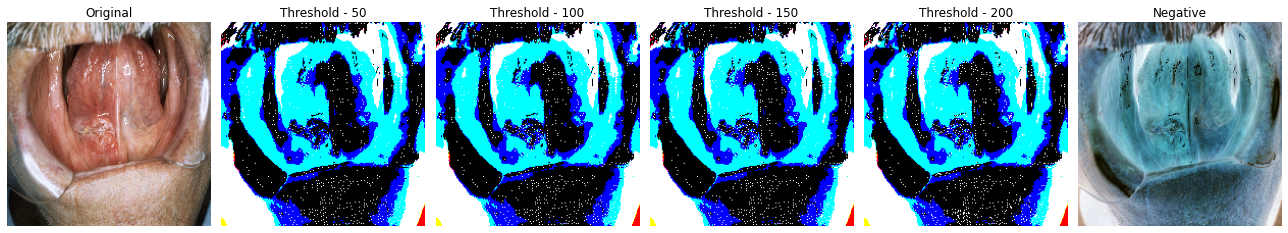

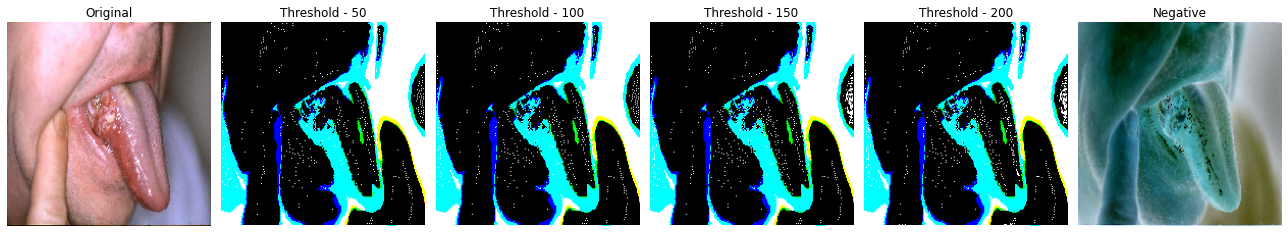

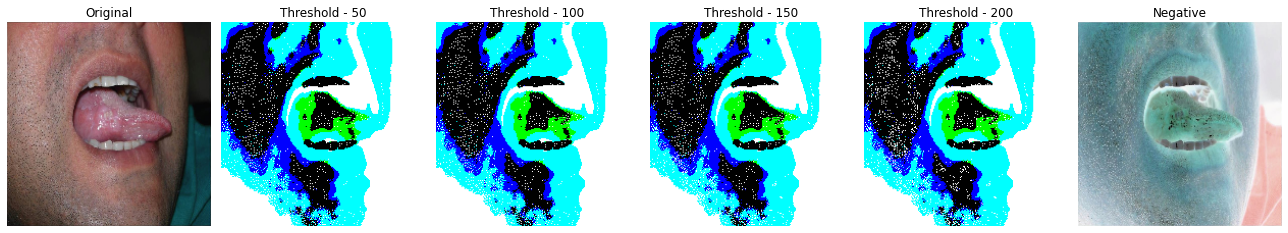

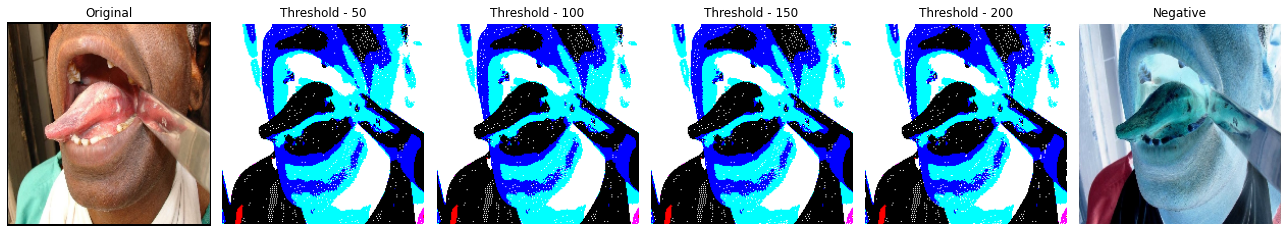

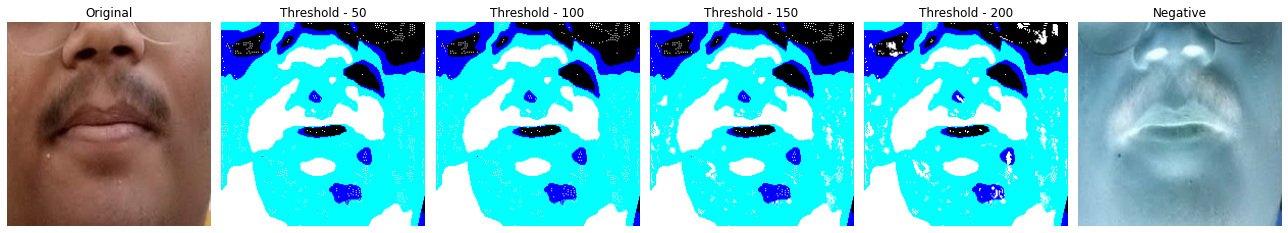

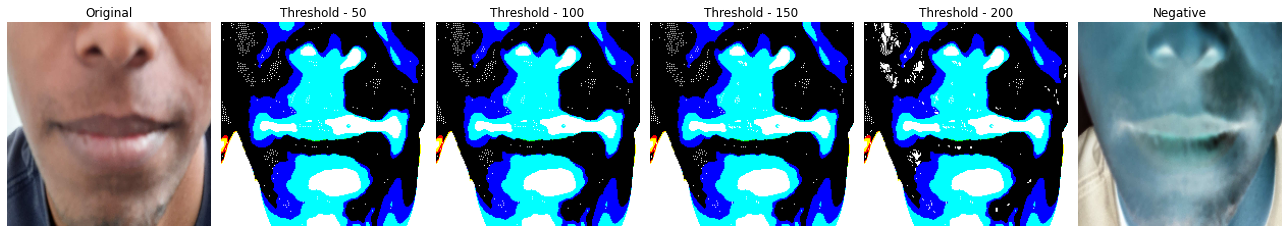

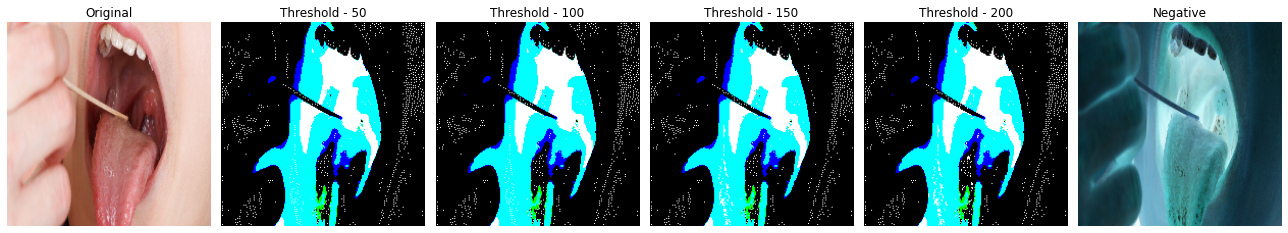

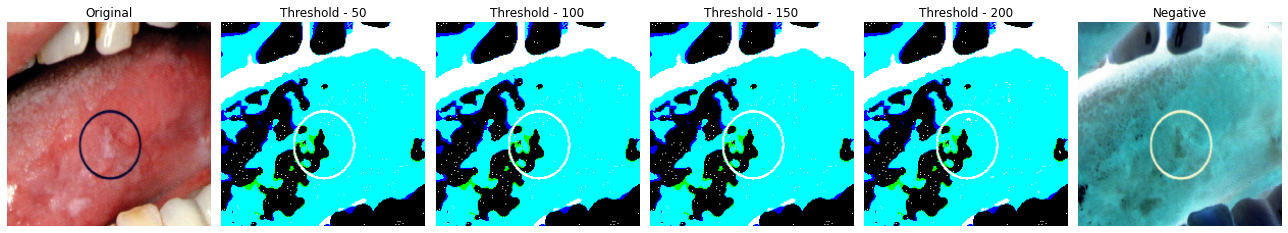

In [ ]:
for idx in range(10):
    img_path = f"./{dest}/{dest}_{str(idx+1)}.jpg"
    print_image(src[idx],img_path)